In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import visualize_utils


In [8]:
log_root = "../unet/log/attribution_pickle/resUnet"
figure_log_root = "../unet/log/figures/resUnet"


window = [16, 13]
file_path = f"2019-09-29_berlin_9ch142-saliency-target-channel0-W{window[0]}-{window[1]}.npy"
window_size = 21
attr = np.load(os.path.join(log_root, file_path))
print(attr.shape)
file_format = "png"


(1, 115, 512, 448)


## Aggregate by channel: Which channel contributes a lot in predicting the selected pixel of channel 0 (first time slot, volume of NE)


In [13]:
agg_channel = np.sum(attr[0].reshape(attr[0].shape[0], -1), axis=1)
# Incident level per time epoch
agg_incident = agg_channel[:108].reshape(12, -1)[:, -1]
# Volume / speed per time epoch
agg_volume_speed = np.sum(agg_channel[:108].reshape(12, -1)[:, :-1].reshape(12, -1, 2), axis=1)/4
# Static features
agg_static = agg_channel[108:]

In [28]:
# Save as npy array
save_arr = np.concatenate((agg_volume_speed, agg_incident[:,None]), axis=1)
np.save("test.npy", save_arr)
# Save static features
np.save("static.npy", agg_static)

In [26]:
agg_incident[:,None].shape

(12, 1)

In [17]:
agg_volume_speed

array([[ 31.43058 ,  39.986336],
       [ 29.270575,  41.671303],
       [ 30.202805,  42.03207 ],
       [ 31.092756,  43.86717 ],
       [ 32.365734,  45.18937 ],
       [ 35.126225,  45.020878],
       [ 37.38875 ,  46.050217],
       [ 40.845757,  46.716114],
       [ 45.198544,  47.17302 ],
       [ 54.43602 ,  49.263836],
       [ 79.10679 ,  59.065666],
       [443.2268  , 283.50507 ]], dtype=float32)

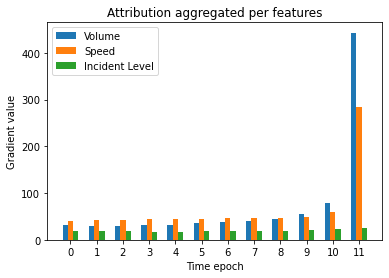

In [11]:
BAR_WIDTH = 0.2
x = np.arange(agg_incident.shape[0])
plt.bar(x-BAR_WIDTH, height=agg_volume_speed[:,0], label="Volume", width=BAR_WIDTH)
plt.bar(x, height=agg_volume_speed[:,1], label="Speed", width=BAR_WIDTH)
plt.bar(x+BAR_WIDTH, height=agg_incident, label="Incident Level", width=BAR_WIDTH)
plt.ylabel("Gradient value")
plt.xlabel("Time epoch")
plt.xticks(x)
plt.title("Attribution aggregated per features")
plt.legend()
plt.savefig(os.path.join(figure_log_root, os.path.split(file_path)[-1][:-3] + f"-attr-features.{file_format}"),
            bbox_inches="tight")
plt.show()

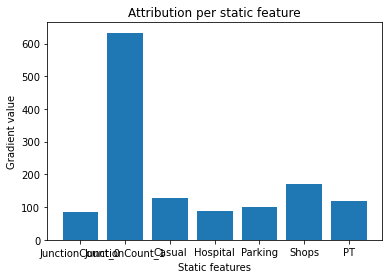

In [12]:
plt.bar(x=[v for k, v in sorted(visualize_utils.input_static_semantic_dict.items(), key=lambda _:_[0])], height=agg_static)
plt.ylabel("Gradient value")
plt.xlabel("Static features")
plt.savefig(os.path.join(figure_log_root, os.path.split(file_path)[-1][:-3] + f"-attr-static.{file_format}"),
            bbox_inches="tight")
plt.title("Attribution per static feature")
plt.show()